In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../combined_parquets.csv', index_col=0)

In [4]:
df

,store_code,date_code,period_code,redeemer_latest_ind,customer_code,customer_segment_level_1_code,customer_segment_level_2_code,revenue_after_discount_incl_vat,quantity_sold,store_type_new
0,313,20220321,4,0,1451810,2.0,2.0,729.0,6.000,Daily
1,236,20210111,2,0,1347670,2.0,2.0,305.0,2.358,Hypermarket
2,420,20220205,4,0,1287290,1.0,1.0,2221.0,9.150,Hypermarket
3,234,20200914,1,1,1270550,3.0,6.0,4104.0,17.934,Hypermarket
4,317,20210716,3,0,1224560,3.0,6.0,6539.0,29.580,Daily
...,...,...,...,...,...,...,...,...,...,...
3252962,243,20211007,3,1,1282760,1.0,1.0,10600.0,38.951,Hypermarket
3252963,212,20210111,2,1,1250250,1.0,1.0,3110.0,7.876,Hypermarket
3252964,221,20210818,3,0,1231940,1.0,1.0,5364.0,18.374,Hypermarket
3252965,228,20220325,4,1,50600,3.0,4.0,1203.0,2.000,Hypermarket


## RFM Analysis

Recency, Frequency, and Monetary Value analysis. Recency in this case is not so relevant as there are different periods which are compared thus the recency factor will be disregarded. Next to that, we want to distinguish the 'loyal customers' before the last period (LY period) to see if the effect on them has improved. Therefore look at period codes 1,2,3.

### Convert date_code column to iso format

In [5]:
df['date_code'] = pd.to_datetime(df['date_code'], format= '%Y%m%d')

In [6]:
df

,store_code,date_code,period_code,redeemer_latest_ind,customer_code,customer_segment_level_1_code,customer_segment_level_2_code,revenue_after_discount_incl_vat,quantity_sold,store_type_new
0,313,2022-03-21,4,0,1451810,2.0,2.0,729.0,6.000,Daily
1,236,2021-01-11,2,0,1347670,2.0,2.0,305.0,2.358,Hypermarket
2,420,2022-02-05,4,0,1287290,1.0,1.0,2221.0,9.150,Hypermarket
3,234,2020-09-14,1,1,1270550,3.0,6.0,4104.0,17.934,Hypermarket
4,317,2021-07-16,3,0,1224560,3.0,6.0,6539.0,29.580,Daily
...,...,...,...,...,...,...,...,...,...,...
3252962,243,2021-10-07,3,1,1282760,1.0,1.0,10600.0,38.951,Hypermarket
3252963,212,2021-01-11,2,1,1250250,1.0,1.0,3110.0,7.876,Hypermarket
3252964,221,2021-08-18,3,0,1231940,1.0,1.0,5364.0,18.374,Hypermarket
3252965,228,2022-03-25,4,1,50600,3.0,4.0,1203.0,2.000,Hypermarket


## Leave out period 4 due to further analysis

In [7]:
df_without_period_4 = df[df['period_code'] != 4]

In [8]:
print("Period 4 contained" , len(df)-len(df_without_period_4), 'of the total', len(df), 'entries')
print("% of total entries left: ", (len(df_without_period_4) / len(df)) * 100)

Period 4 contained 803485 of the total 3252967 entries
% of total entries left:  75.29993387575097


In [28]:
now = max(df_without_period_4['date_code'])
now

Timestamp('2021-11-14 00:00:00')

In [22]:
rfm= df_without_period_4.groupby('customer_code').agg({'customer_code': lambda num: len(num),
                                        'revenue_after_discount_incl_vat': lambda price: price.sum(),
                                                      'date_code': lambda x: (now - x.max()).days})

In [24]:
rfm.columns=['frequency', 'monetary','recency']

In [25]:
rfm

,frequency,monetary,recency
customer_code,,,
10,191,155267.00,0
20,51,98103.36,21
30,16,54187.00,42
40,53,108680.00,18
120,73,109077.00,5
...,...,...,...
1481400,144,898312.57,3
1481450,18,10431.00,66
1481460,32,95665.00,7


### Computing quantiles of RFM Values

In [29]:
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])

In [30]:
rfm['FM_Score'] = rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str) + rfm.r_quartile.astype(str)

In [31]:
rfm

,frequency,monetary,recency,f_quartile,m_quartile,r_quartile,FM_Score
customer_code,,,,,,,
10,191,155267.00,0,1,2,1,121
20,51,98103.36,21,2,2,3,223
30,16,54187.00,42,4,3,4,434
40,53,108680.00,18,2,2,3,223
120,73,109077.00,5,2,2,2,222
...,...,...,...,...,...,...,...
1481400,144,898312.57,3,1,1,2,112
1481450,18,10431.00,66,3,4,4,344
1481460,32,95665.00,7,3,2,2,322


In [36]:
loyal_customers = rfm[rfm['FM_Score'].str.contains('111|112|121|211')]

In [37]:
loyal_customers.reset_index(inplace=True)

In [38]:
loyal_customers

,customer_code,frequency,monetary,recency,f_quartile,m_quartile,r_quartile,FM_Score
0,10,191,155267.00,0,1,2,1,121
1,310,305,293117.00,3,1,1,2,112
2,460,176,1160397.27,0,1,1,1,111
3,510,259,382472.03,3,1,1,2,112
4,690,98,425967.05,7,1,1,2,112
...,...,...,...,...,...,...,...,...
8850,1481060,228,537017.54,0,1,1,1,111
8851,1481300,195,204379.75,0,1,1,1,111
8852,1481400,144,898312.57,3,1,1,2,112
8853,1481490,95,251116.03,4,1,1,2,112


In [39]:
print(len(loyal_customers) / len(rfm) * 100)

20.845103578154426


In [40]:
loyal_customers_data = df[df['customer_code'].isin(loyal_customers['customer_code'])]

In [44]:
loyal_customers_data.to_csv('../loyal_customer_data.csv')

### Identify the difference between period 123 and 4 of the top customers

Calculate CLV over time

CLV = Average Purchase Value * Average Purchase Frequency * Average Customer Lifespan

Average Purchase Value (APV) = Total Revenue / Total number of purchases

Average Purchase Frequency (APF) = Number of purchases / Number of unique customers

Average Customer Lifespan (ACL) = Sum of customer lifespan / Number of customers

In [45]:
number_unique_customers_period12 = top_customers_data[top_customers_data['customer_code'] != 3]

NameError: name 'top_customers_data' is not defined

In [42]:
number_unique_customers_period12

,store_code,date_code,period_code,redeemer_latest_ind,customer_code,customer_segment_level_1_code,customer_segment_level_2_code,revenue_after_discount_incl_vat,quantity_sold,store_type_new
2,420,2022-02-05,4,0,1287290,1.0,1.0,2221.0,9.150,Hypermarket
3,234,2020-09-14,1,1,1270550,3.0,6.0,4104.0,17.934,Hypermarket
4,317,2021-07-16,3,0,1224560,3.0,6.0,6539.0,29.580,Daily
5,215,2021-01-27,2,0,1220570,1.0,1.0,6751.0,26.240,Hypermarket
6,269,2020-10-14,1,1,1218130,1.0,1.0,4990.0,17.542,Hypermarket
...,...,...,...,...,...,...,...,...,...,...
3252959,234,2022-03-05,4,1,880230,3.0,6.0,6889.0,19.796,Hypermarket
3252960,344,2022-03-21,4,1,1427520,1.0,1.0,10462.0,15.934,Hypermarket
3252962,243,2021-10-07,3,1,1282760,1.0,1.0,10600.0,38.951,Hypermarket
3252963,212,2021-01-11,2,1,1250250,1.0,1.0,3110.0,7.876,Hypermarket


In [49]:
df_avg = top_customers_data.groupby('date_code')['revenue_after_discount_incl_vat'].mean()

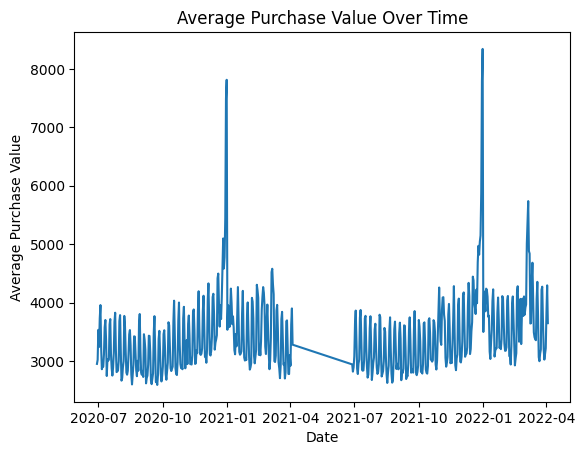

In [50]:
plt.plot(df_avg)
plt.xlabel('Date')
plt.ylabel('Average Purchase Value')
plt.title('Average Purchase Value Over Time')
plt.show()

In [51]:
outliers = df_avg[df_avg > 5000]

In [54]:
outliers

date_code
2020-12-26    5098.327190
2020-12-29    5451.106339
2020-12-30    7491.702921
2020-12-31    7812.453636
2021-12-27    5043.033183
2021-12-28    5148.827956
2021-12-29    5882.108414
2021-12-30    7787.675101
2021-12-31    8340.762242
2022-03-04    5006.157780
2022-03-05    5362.823005
2022-03-06    5737.297754
Name: revenue_after_discount_incl_vat, dtype: float64

In [59]:
min(top_customers_data[top_customers_data['period_code'] == 4]['date_code'])
max(top_customers_data[top_customers_data['period_code'] == 4]['date_code'])


Timestamp('2022-04-03 00:00:00')